# **1. Perkenalan dataset**

Dataset ini diambil dari kaggle dengan nama **"Weather Prediction"**.

Dataset ini dapat diakses melalui link berikut ini: https://www.kaggle.com/datasets/ananthr1/weather-prediction/data

Dataset ini berisi 1461 baris data dan 6 kolom faktor-faktor yang dapat mempengaruhi cuaca.

Tujuan dari dataset ini adalah membangun model machine learning untuk memprediksi kondisi cuaca seperti drizzle, rain, sun, snow, dan fog.

Fitur-fitur dataset:

Fitur numerik:
- precipitation: curah hujan (mm)
- temp_max: suhu maksimum (°C)
- temp_min: suhu minimum (°C)
- wind: kecepatan angin (m/s)

Fitur kategorik:
- weather: kondisi cuaca (rain, sun, fog, drizzle, snow)


Kolom tanggal:
- date

# **2. Import library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# **3. Memuat dataset**

In [2]:
# Import module yang disediakan google colab untuk kebutuhan upload file

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nanaa17","key":"f584a0995504f1bb2ee6f746d973ee8a"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d ananthr1/weather-prediction

Dataset URL: https://www.kaggle.com/datasets/ananthr1/weather-prediction
License(s): CC-BY-NC-SA-4.0
  0% 0.00/11.5k [00:00<?, ?B/s]
100% 11.5k/11.5k [00:00<00:00, 45.3MB/s]


In [6]:
!unzip weather-prediction.zip

Archive:  weather-prediction.zip
replace seattle-weather.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: seattle-weather.csv     


In [7]:
df = pd.read_csv('/content/seattle-weather.csv')

In [8]:
# tampilan awal data
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [9]:
# Informasi struktur data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


# **4. Exploratory Data Analysis (EDA)**

In [10]:
# Statistik deskriptif
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [11]:
# Cek missing value
print(df.isnull().sum())

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64


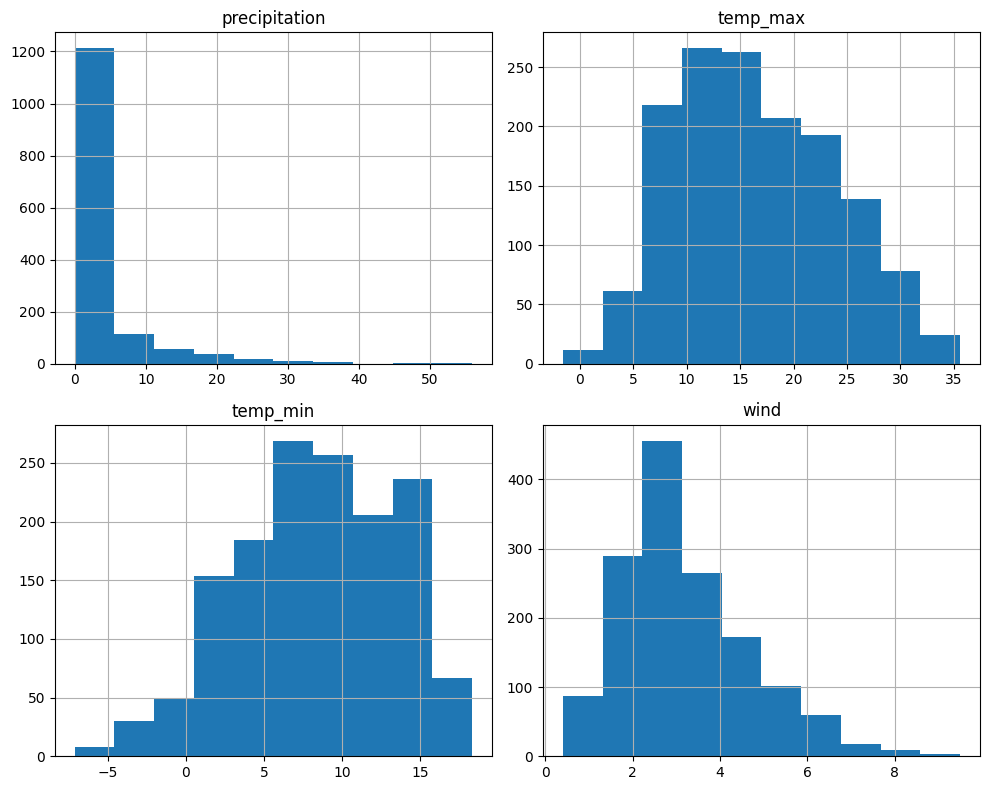

In [12]:
# Distribusi variabel numerik
numeric_cols = ['precipitation', 'temp_max', 'temp_min', 'wind']
df[numeric_cols].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


=== Distribusi Label Weather ===
weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64


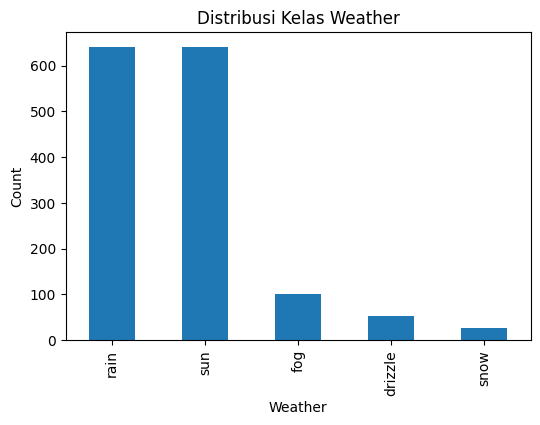

In [13]:
# Distribusi label weather
print("\n=== Distribusi Label Weather ===")
print(df['weather'].value_counts())
df['weather'].value_counts().plot(kind='bar', figsize=(6,4))
plt.xlabel("Weather")
plt.ylabel("Count")
plt.title("Distribusi Kelas Weather")
plt.show()

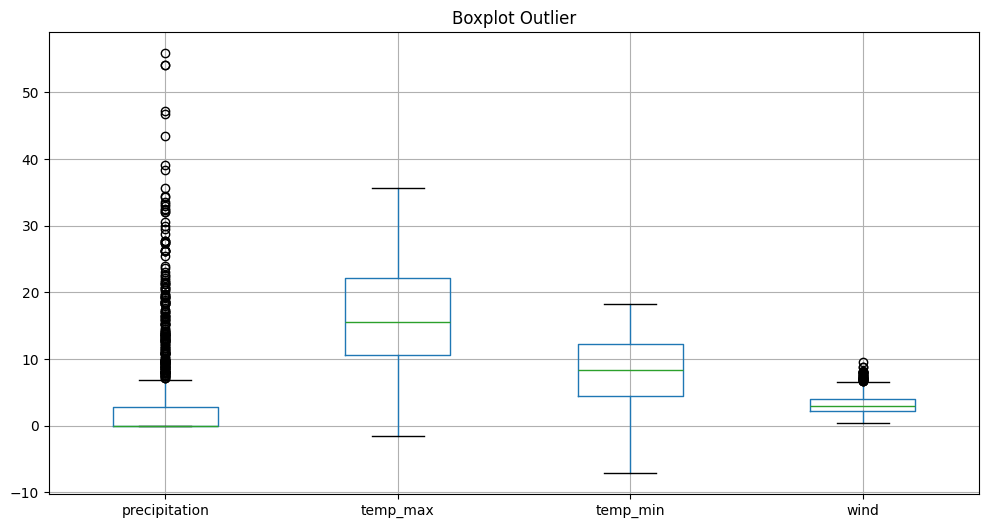

Jumlah data: 1461


In [14]:
# Memeriksa Outlier
plt.figure(figsize=(12,6))
df[numeric_cols].boxplot()
plt.title("Boxplot Outlier")
plt.show()
print("Jumlah data:", len(df))

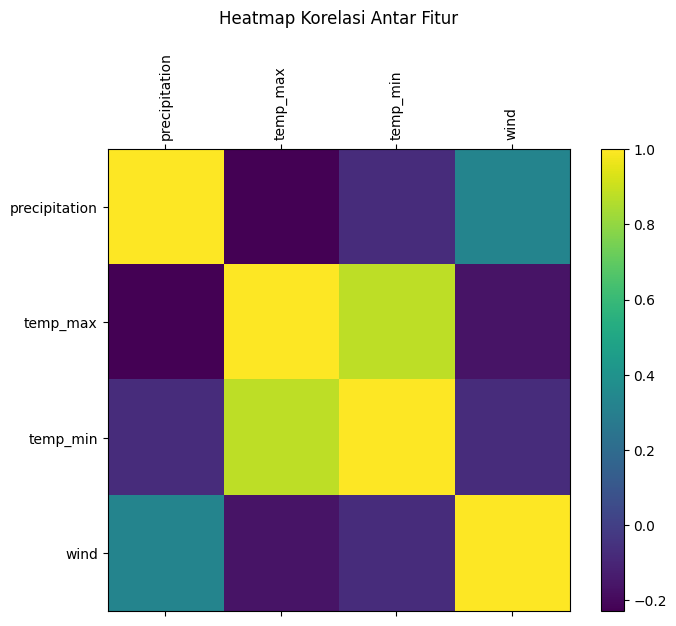

In [15]:
# Korelasi antar fitur numerik
corr = df[numeric_cols].corr()
fig, ax = plt.subplots(figsize=(8,6))
cax = ax.matshow(corr)
fig.colorbar(cax)
ax.set_xticks(range(len(numeric_cols)))
ax.set_yticks(range(len(numeric_cols)))
ax.set_xticklabels(numeric_cols, rotation=90)
ax.set_yticklabels(numeric_cols)
plt.title("Heatmap Korelasi Antar Fitur", pad=20)
plt.show()

# **5. Data Preprocessing**

In [16]:
# Convert kolom date ke datetime
df['date'] = pd.to_datetime(df['date'])

In [17]:
# Deteksi & tangani outlier (IQR method)
def remove_outliers_iqr(data, cols):
    for col in cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower) & (data[col] <= upper)]
    return data

numeric_cols = ['precipitation', 'temp_max', 'temp_min', 'wind']
df = remove_outliers_iqr(df, numeric_cols)
print("\nJumlah data setelah menghapus outlier:", len(df))


Jumlah data setelah menghapus outlier: 1211


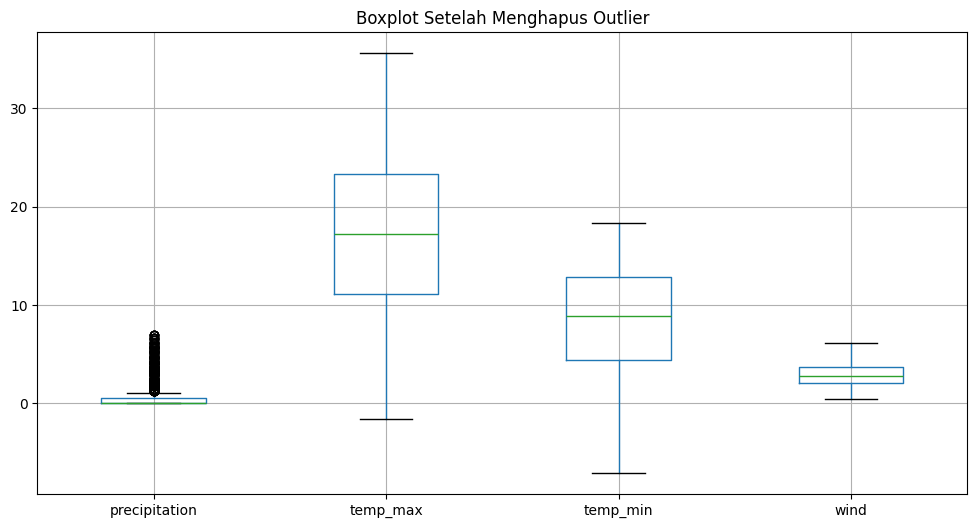

In [18]:
# Boxplot AFTER
plt.figure(figsize=(12,6))
df[numeric_cols].boxplot()
plt.title("Boxplot Setelah Menghapus Outlier")
plt.show()

In [19]:
# mengulangi penanganan outlier (IQR method)
def remove_outliers_iqr(data, cols):
    for col in cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower) & (data[col] <= upper)]
    return data

numeric_cols = ['precipitation', 'temp_max', 'temp_min', 'wind']
df = remove_outliers_iqr(df, numeric_cols)
print("\nJumlah data setelah menghapus outlier:", len(df))


Jumlah data setelah menghapus outlier: 946


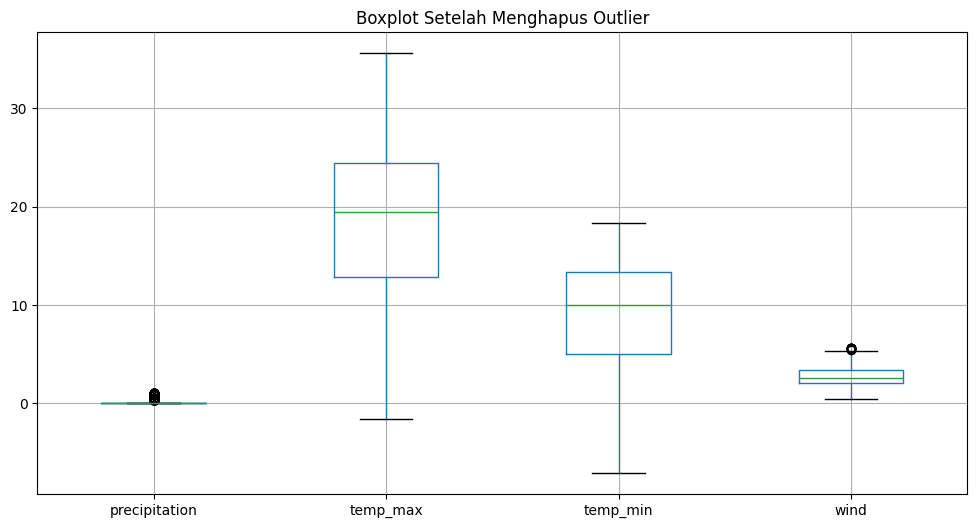

In [20]:
# Boxplot AFTER
plt.figure(figsize=(12,6))
df[numeric_cols].boxplot()
plt.title("Boxplot Setelah Menghapus Outlier")
plt.show()

In [21]:
# mengulangi penanganan outlier (IQR method)
def remove_outliers_iqr(data, cols):
    for col in cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower) & (data[col] <= upper)]
    return data

numeric_cols = ['precipitation', 'temp_max', 'temp_min', 'wind']
df = remove_outliers_iqr(df, numeric_cols)
print("\nJumlah data setelah menghapus outlier:", len(df))


Jumlah data setelah menghapus outlier: 804


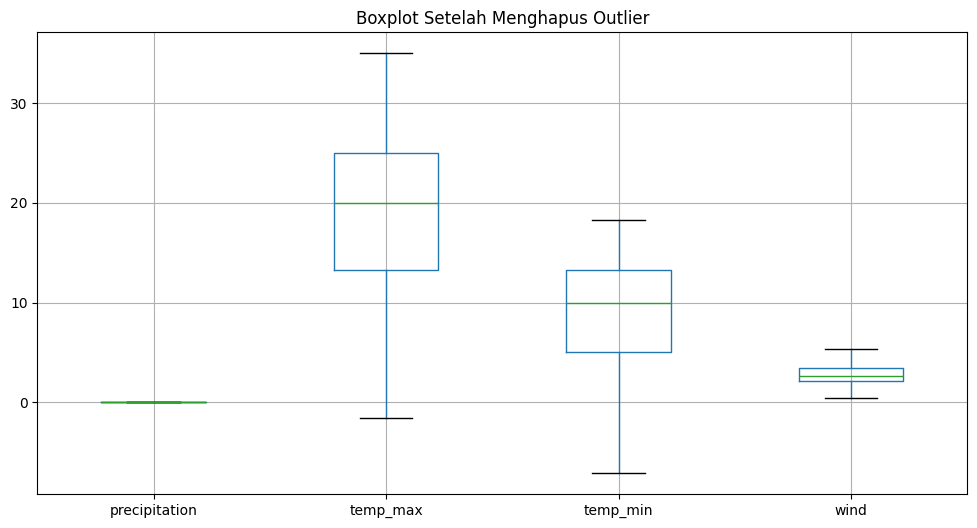

In [22]:
# Boxplot AFTER
plt.figure(figsize=(12,6))
df[numeric_cols].boxplot()
plt.title("Boxplot Setelah Menghapus Outlier")
plt.show()

In [23]:
# Label Encoding untuk weather
label_encoder = LabelEncoder()
df['weather_encoded'] = label_encoder.fit_transform(df['weather'])

In [24]:
# Scaling fitur numerik
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [25]:
# Split fitur & label
X = df[numeric_cols]
y = df['weather_encoded']

In [26]:
print("Shape Fitur dan Label")
print("X:", X.shape)
print("Y:", y.shape)

Shape Fitur dan Label
X: (804, 4)
Y: (804,)
